# Geographic Data with GeoPandas

This tutorial extends the basic GeoPandas introduction to oceanographic datasets.

We'll use **Exclusive Economic Zones (EEZ)** data from the [Marine Regions](https://www.marineregions.org/eez.php) project.
The EEZ defines the sea zone over which a state has special rights regarding exploration and use of marine resources.

In [1]:

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature



## 1. Loading EEZ Data

Download the EEZ shapefile from [Marine Regions EEZ and IHO areas v5](https://www.marineregions.org/downloads.php#ihoeez).  
Make sure you unzip it, and replace the file path below with the location of the `.shp` file.


In [2]:

# Load EEZ shapefile (update path to your local copy)
eez_path = "/Users/tgstone/data/SIO_software_carpentries/Intersect_EEZ_IHO_v5_20241010/Intersect_EEZ_IHO_v5_20241010.shp"  # Example path
eez = gpd.read_file(eez_path)

# Display data file
eez.head()


,MRGID,MarRegion,MRGID_SOV1,SOVEREIGN1,UN_SOV1,ISO_SOV1,MRGID_SOV2,SOVEREIGN2,UN_SOV2,ISO_SOV2,...,ISO_TER3,EEZ_MRGID,EEZ,IHO_MRGID,IHO_Sea,AREA_KM2,Latitude,Longitude,MRGID_comb,geometry
0,25614,Albanian part of the Adriatic Sea,2153,Albania,8,ALB,0,None,0,None,...,None,5670,Albanian Exclusive Economic Zone,3314,Adriatic Sea,12127.0,40.93096,19.11030,3314_5670,"POLYGON ((19.9858 39.74337, 19.95858 39.7432, ..."
1,25622,Albanian part of the Ionian Sea,2153,Albania,8,ALB,0,None,0,None,...,None,5670,Albanian Exclusive Economic Zone,3351,Ionian Sea,39.0,39.69394,19.97118,3351_5670,"POLYGON ((20.00835 39.69182, 20.0081 39.69187,..."
2,25603,Algerian part of the Alboran Sea,2152,Algeria,12,DZA,0,None,0,None,...,None,8378,Algerian Exclusive Economic Zone,3324,Alboran Sea,7045.0,35.58150,-1.74716,3324_8378,"POLYGON ((-1.18826 35.57788, -1.18973 35.5758,..."
3,25180,Algerian part of the Mediterranean Sea - Weste...,2152,Algeria,12,DZA,0,None,0,None,...,None,8378,Algerian Exclusive Economic Zone,4279,Mediterranean Sea - Western Basin,124141.0,37.29350,3.83338,4279_8378,"POLYGON ((7.81205 38.00998, 7.81355 38.00945, ..."
4,25525,Angolan part of the South Atlantic Ocean,2150,Angola,24,AGO,0,None,0,None,...,None,8478,Angolan Exclusive Economic Zone,1914,South Atlantic Ocean,495860.0,-11.70110,11.03537,1914_8478,"MULTIPOLYGON (((13.42086 -5.8734, 13.39728 -5...."



## 2. Plotting EEZ Boundaries

We can visualize all EEZ boundaries in the world.


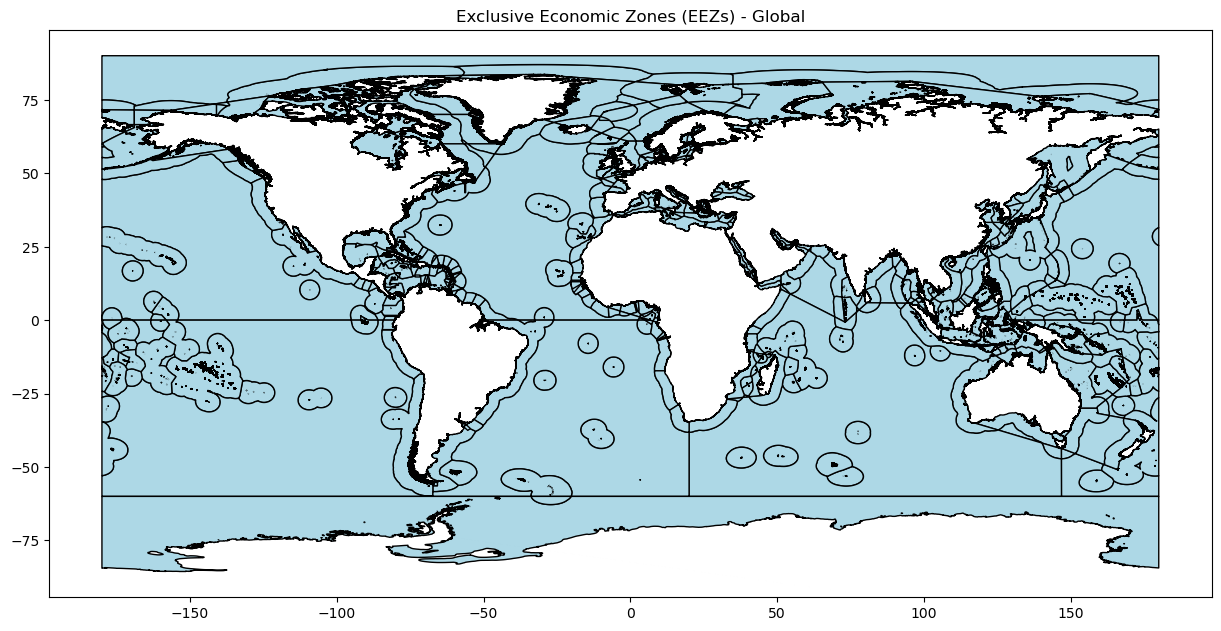

In [3]:

# Basic plot of EEZ polygons
eez.plot(figsize=(15, 10), color="lightblue", edgecolor="black")
plt.title("Exclusive Economic Zones (EEZs) - Global")
plt.show()



## 3. Overlay EEZ with Land Boundaries

Let's overlay EEZ boundaries with a world basemap from GeoPandas' built-in dataset.


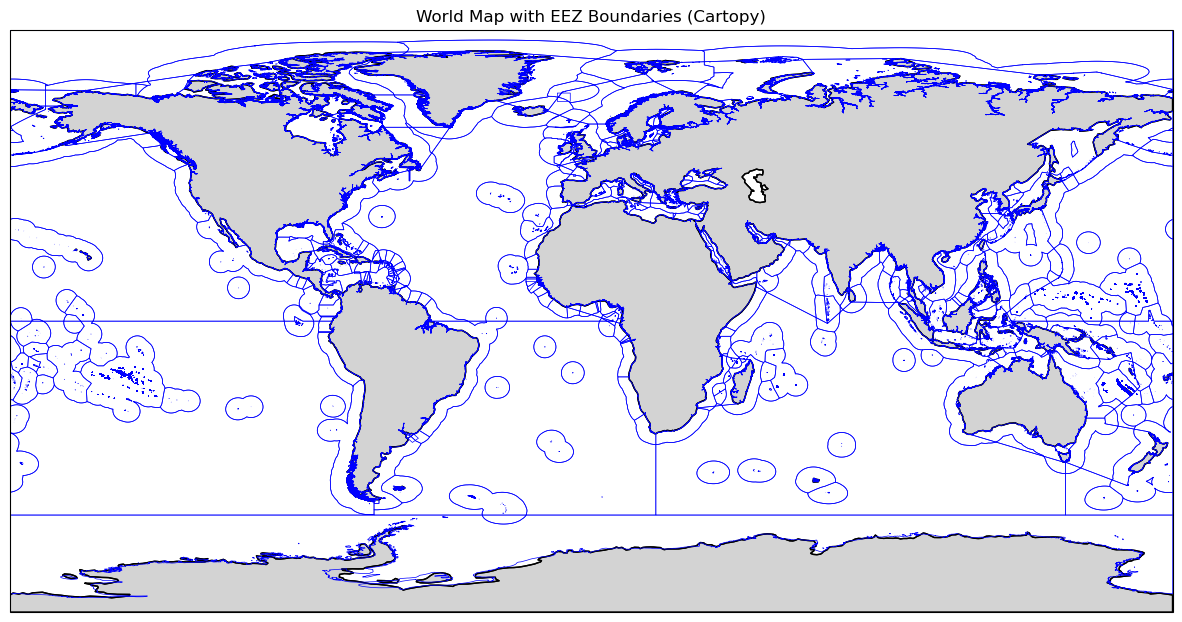

In [4]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add land feature for world basemap
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax.coastlines()

# Plot EEZ boundaries using GeoPandas with Cartopy axes
eez.boundary.plot(ax=ax, color="blue", linewidth=0.5, transform=ccrs.PlateCarree())

plt.title("World Map with EEZ Boundaries (Cartopy)")
plt.show()


## 4. Filtering EEZ for a Specific Country

We can filter the EEZ dataset by the `SOVEREIGN1` field to show only one country's EEZ.


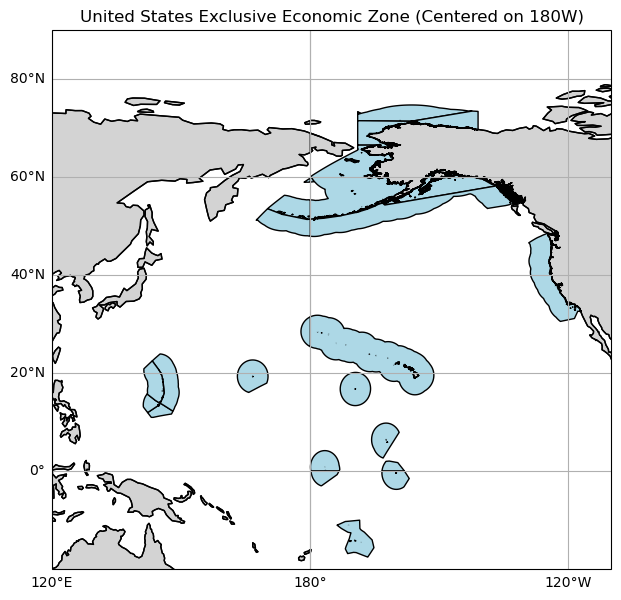

In [5]:
usa_eez = eez[eez["SOVEREIGN1"] == "United States"]

fig, ax = plt.subplots(figsize=(15, 7), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

# Add land feature for world basemap
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax.coastlines()

# Add longitude and latitude gridlines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

# Center the map on 180W (central_longitude=180) and set a reasonable extent
ax.set_extent([120, 250, -20, 90], crs=ccrs.PlateCarree())

# Plot United States EEZ polygons using GeoPandas with Cartopy axes
usa_eez.plot(ax=ax, color="lightblue", edgecolor="black", transform=ccrs.PlateCarree())

plt.title("United States Exclusive Economic Zone (Centered on 180W)")
plt.show()